In [2]:
import FinanceDataReader as fdr
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import pickle
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.tseries.offsets import BDay

In [27]:
dt_list1 = ['2023-01-02','2023-01-03','2023-01-04','2023-01-05','2023-01-06','2023-01-09','2023-01-10','2023-01-11','2023-01-12','2023-01-13','2023-01-16',\
            '2023-01-17','2023-01-18','2023-01-19','2023-01-20','2023-01-25','2023-01-26','2023-01-27','2023-01-30','2023-01-31']
dt_list2 = ['2023-02-01','2023-02-02','2023-02-03','2023-02-06','2023-02-07','2023-02-08','2023-02-09','2023-02-10','2023-02-13','2023-02-14','2023-02-15','2023-02-16','2023-02-17',\
            '2023-02-20']
dt_list = dt_list1 + dt_list2 

In [28]:
df_all = pd.DataFrame()

for dt in dt_list:
    kq_yymmdd = pd.read_pickle('kq_selection_' + str(dt) + '.pkl')['name']
    for code in list(kq_yymmdd.index):
        start_dt = dt
        end_dt = datetime.datetime.strptime(dt, '%Y-%m-%d') + BDay(10)
        df = fdr.DataReader(code, start=start_dt, end=end_dt) 
        df = df.head(6)
        df['code'] = code
        df['name'] = kq_yymmdd.loc[code]
        df['select_dt'] = dt 
        df = df.reset_index().set_index('select_dt')[['Date','code','name','Open','High','Low','Close','Volume']]
        df_all = pd.concat([df_all, df], axis=0)

NameError: name 'BDay' is not defined

In [423]:
df_all.to_pickle('backtesting.pkl')

In [424]:
df_all = pd.read_pickle('backtesting.pkl')
c1 = df_all.groupby(['select_dt','name'])[['name','Close']].first(1)
c2 = df_all.groupby(['select_dt','name'])[['Open']].nth(1)
c3 = df_all.groupby(['select_dt','name'])[['High']].nth([1,2,3,4,5]).groupby(['select_dt','name']).max()
c4 = df_all.groupby(['select_dt','name'])[['Low']].nth([1,2,3,4,5]).groupby(['select_dt','name']).min()
c5 = df_all.groupby(['select_dt','name'])[['name','Close']].nth(5)

c_all = pd.concat([c1, c2, c3, c4, c5], axis=1)
c_all['max_return'] = c_all['High']/c_all['Open']
c_all['min_return'] = c_all['Low']/c_all['Open']

In [425]:
c_all.to_excel('hyungbong.xlsx')

Text(0.5, 0, 'Return')

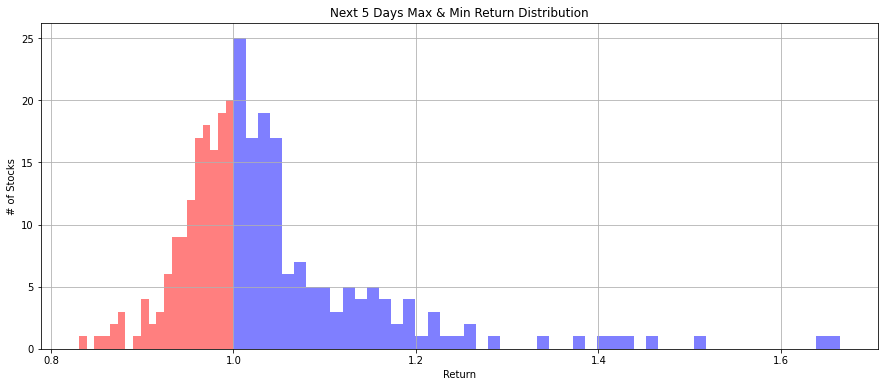

In [375]:
c_all[c_all['min_return']>0]['min_return'].hist(bins=20, figsize=(15,6), color='red', alpha=0.5)
c_all[c_all['max_return']>0]['max_return'].hist(bins=50, figsize=(15,6), color='blue', alpha=0.5)
plt.title('Next 5 Days Max & Min Return Distribution')
plt.ylabel('# of Stocks')
plt.xlabel('Return')

In [376]:
c_all[c_all['min_return']>0]['min_return'].describe(percentiles=[0.05, 0.1, 0.9, 0.95])

count    144.000000
mean       0.959217
std        0.033934
min        0.830671
5%         0.883327
10%        0.915335
50%        0.967145
90%        0.993652
95%        0.997786
max        1.000000
Name: min_return, dtype: float64

In [139]:
# b1 =  df_all.groupby(['select_dt','name'])[['name','Low','High']].first(1).apply(lambda x: x['High'] - x['Low'], axis=1)
# b2 = df_all.groupby(['select_dt','name'])[['Open','High']].nth(1)
# b3 = df_all.groupby(['select_dt','name'])['Open'].nth(2)

In [170]:
price_range = df_all.groupby(['select_dt','name']).first()[['Low','High']].apply(lambda x: (x['High'] -x['Low']), axis=1)

In [173]:
open_price = df_all.groupby(['select_dt','name']).nth(1)['Open'] 
min_price

In [306]:
#'322180''086960'
s = fdr.DataReader('086960', start='2022-11-01', end='2023-02-10') 
s.index = [d.strftime('%y-%m-%d') for d in (s['Close'].index)]

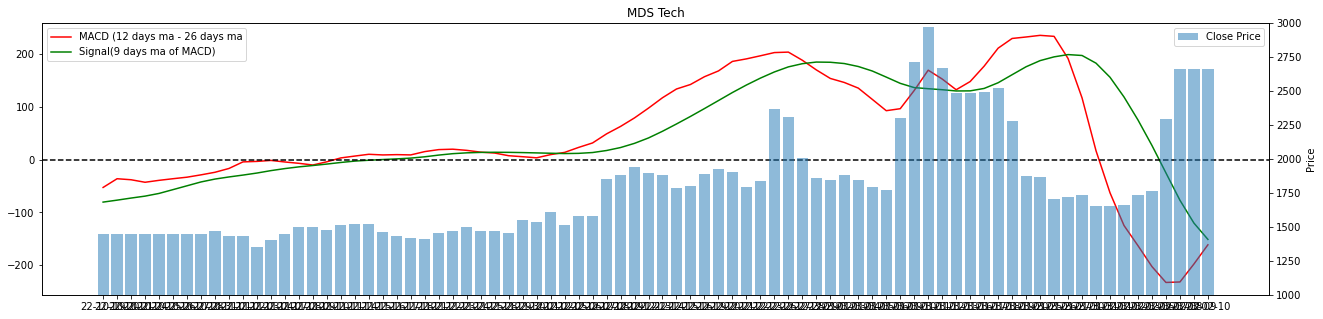

In [350]:
s = fdr.DataReader('086960', start='2022-08-01', end='2023-02-10') 
s.index = [d.strftime('%y-%m-%d') for d in (s['Close'].index)]
i = 80
fig, ax = plt.subplots(figsize=(22,5))
plt.title('MDS Tech')
ma12 = s['Close'].rolling(12).mean()
ma26 = s['Close'].rolling(26).mean()
macd = ma12 - ma26
signal = macd.rolling(9).mean()

ax.plot(macd.tail(i), color='red', label='MACD (12 days ma - 26 days ma')
ax.plot(signal.tail(i), color='green', label='Signal(9 days ma of MACD)')
ax.axhline(0, color='black', linestyle='--')
ax2 = ax.twinx()
ax2.bar(height=s['Close'].tail(i), x=s.tail(i).index, label='Close Price', alpha=0.5)
ax.legend(loc=2)
ax2.legend(loc=1)
ax2.set_ylim(1000, 3000)
ax2.set_ylabel('Price')
plt.show()

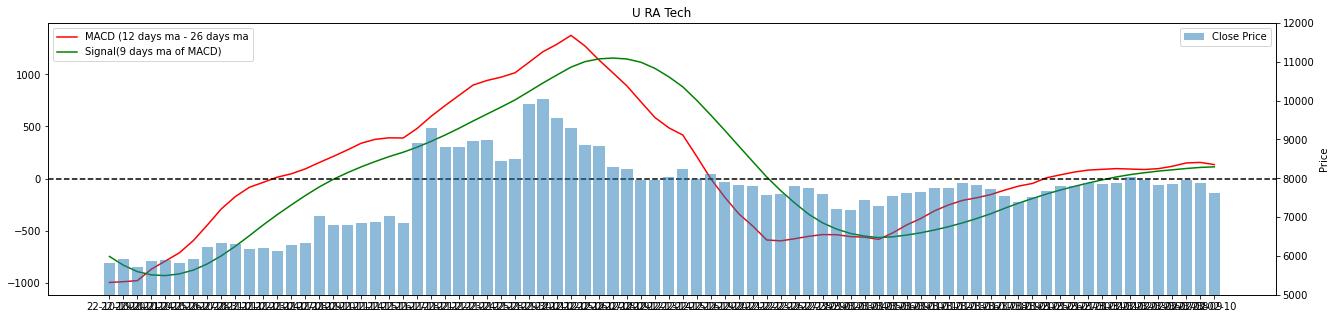

In [349]:
fig, ax = plt.subplots(figsize=(22,5))
plt.title('U RA Tech')
s = fdr.DataReader('048430', start='2022-08-01', end='2023-02-10') 
i = 80
s.index = [d.strftime('%y-%m-%d') for d in (s['Close'].index)]
ma12 = s['Close'].rolling(12).mean()
ma26 = s['Close'].rolling(26).mean()
macd = ma12 - ma26
signal = macd.rolling(9).mean()
ax.plot(macd.tail(i), color='red', label='MACD (12 days ma - 26 days ma')
ax.plot(signal.tail(i), color='green', label='Signal(9 days ma of MACD)')
ax.axhline(0, color='black', linestyle='--')
ax2 = ax.twinx()
ax2.bar(height=s['Close'].tail(i), x=s.tail(i).index, label='Close Price', alpha=0.5)
ax.legend(loc=2)
ax2.legend(loc=1)
ax2.set_ylim(5000, 12000)
ax2.set_ylabel('Price')
plt.show()

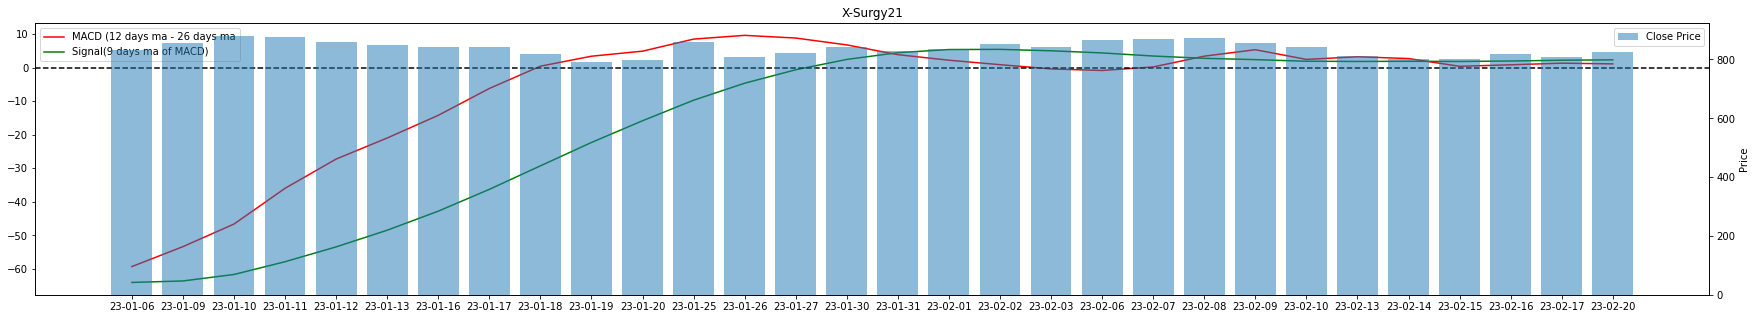

In [431]:
s = fdr.DataReader('192410', start='2022-08-01', end='2023-02-20') 
s.index = [d.strftime('%y-%m-%d') for d in (s['Close'].index)]
i = 30
fig, ax = plt.subplots(figsize=(30,5))
plt.title('X-Surgy21')
ma12 = s['Close'].rolling(12).mean()
ma26 = s['Close'].rolling(26).mean()
macd = ma12 - ma26
signal = macd.rolling(9).mean()

ax.plot(macd.tail(i), color='red', label='MACD (12 days ma - 26 days ma')
ax.plot(signal.tail(i), color='green', label='Signal(9 days ma of MACD)')
ax.axhline(0, color='black', linestyle='--')
ax2 = ax.twinx()
ax2.bar(height=s['Close'].tail(i), x=s.tail(i).index, label='Close Price', alpha=0.5)
ax.legend(loc=2)
ax2.legend(loc=1)
ax2.set_ylabel('Price')
plt.show()

In [309]:
s

Open  High   Low  Close     Volume    Change
Date                                                    
2022-11-01  1470  1487  1420   1430     838360 -0.025886
2022-11-02  1475  1475  1432   1435     418524  0.003497
2022-11-03  1420  1432  1325   1350     759720 -0.059233
2022-11-04  1335  1412  1280   1405     877704  0.040741
2022-11-07  1392  1492  1387   1448     799224  0.030605
...          ...   ...   ...    ...        ...       ...
2023-02-06  1742  1814  1700   1762   15437088  0.016148
2023-02-07  1764  2290  1764   2290  154878873  0.299659
2023-02-08  2390  2900  2180   2660  278332211  0.161572
2023-02-09  2630  2780  2540   2660   76630014  0.000000
2023-02-10  2670  2860  2555   2660   59639230  0.000000

[71 rows x 6 columns]

In [ ]:
import pandas as pd
end_dt = '2023-02-28'
kq_yymmdd = pd.read_pickle('kq_selection_' + str(end_dt) + '.pkl')['name']
from pandas.tseries.offsets import BDay
for code in list(kq_yymmdd.index):
    start_dt = datetime.datetime.strptime(end_dt, '%Y-%m-%d') - BDay(20)
    df = fdr.DataReader(code, start=start_dt, end=end_dt) 
    df['sign'] = np.where(df['Close'] - df['Open']>0, 1, -1)
    df['size'] = (df['High'] - df['Low'])*df['sign']
    df['index'] = df['size']/df['Volume']
    df['return'] = max([[df['Close'].shift(-1),df['Close'].shift(-2),df['Close'].shift(-3),df['Close'].shift(-4),df['Close'].shift(-5)]])/df['Close']
df
    # plt.figure(figsize=(20,6))
    # plt.title(code)
    # ax1 = df['index'].plot(color='royalblue')
    # ax2 = ax1.twinx()
    # ax2 = df['Close'].plot(color='orangered', linestyle='--')     
    # # ax2.axhline(1, color='pink')
    # plt.show()

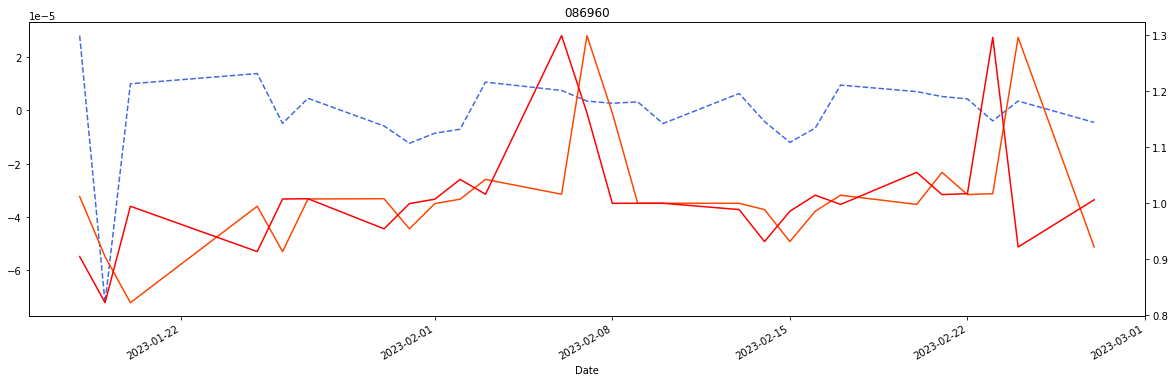

In [28]:
code = '086960'
end_dt = '2023-02-28'
start_dt = datetime.datetime.strptime(end_dt, '%Y-%m-%d') - BDay(30)
df = fdr.DataReader(code, start=start_dt, end=end_dt) 
df['sign'] = np.where(df['Close'] - df['Open']>0, 1, -1)
df['size'] = (df['High'] - df['Low'])*df['sign']
df['index'] = df['size']/df['Volume']
df['close_1'] = df['Close'].shift(-1)
df['return_1'] = df['close_1']/df['Close']
df['return_0'] = df['Close']/df['Close'].shift(1)
df.dropna(inplace=True)
plt.figure(figsize=(20,6))
plt.title(code)
ax1 = df['index'].plot(color='royalblue', linestyle='--')
ax2 = ax1.twinx()
ax2 = df['return_0'].plot(color='orangered') 
ax2 = df['return_1'].plot(color='red') 
plt.show()

In [29]:
df

Open  High   Low  Close     Volume    Change  sign  size  \
Date                                                                   
2023-01-18  2505  2675  2480   2520    6984829  0.012048     1   195   
2023-01-19  2485  2595  2260   2280    4650258 -0.095238    -1  -335   
2023-01-20  1820  1985  1815   1875   17192015 -0.177632     1   170   
2023-01-25  1850  2030  1815   1865   15679505 -0.005333     1   215   
2023-01-26  1777  1791  1700   1704   18422556 -0.086327    -1   -91   
2023-01-27  1716  1751  1708   1717    9661190  0.007629     1    43   
2023-01-30  1734  1780  1725   1731    9323114  0.008154    -1   -55   
2023-01-31  1720  1727  1652   1652    6055571 -0.045638    -1   -75   
2023-02-01  1660  1693  1651   1651    4869508 -0.000605    -1   -42   
2023-02-02  1670  1692  1660   1663    4493615  0.007268    -1   -32   
2023-02-03  1667  1785  1667   1734   11226459  0.042694     1   118   
2023-02-06  1742  1814  1700   1762   15437088  0.016148     1   114   
2023-02-07  1764  2290  1764   2290  154878873  0.299659     1   526   
2023-02-08  2390  2900  2180   2660  278332211  0.161572     1   720   
2023-02-09  2630  2780  2540   2660   76630014  0.000000     1   240   
2023-02-10  2670  2860  2555   2660   61115422  0.000000    -1  -305   
2023-02-13  2535  2670  2485   2660   29624414  0.000000     1   185   
2023-02-14  2730  2980  2630   2630   82727474 -0.011278    -1  -350   
2023-02-15  2750  2760  2420   2450   28223034 -0.068441    -1  -340   
2023-02-16  2450  2545  2405   2415   20927241 -0.014286    -1  -140   
2023-02-17  2370  2460  2295   2450   17568515  0.014493     1   165   
2023-02-20  2415  2565  2415   2445   21532158 -0.002041     1   150   
2023-02-21  2460  2660  2435   2580   44011810  0.055215     1   225   
2023-02-22  2585  2875  2515   2620   85289445  0.015504     1   360   
2023-02-23  2800  2825  2660   2665   41241103  0.017176    -1  -165   
2023-02-24  2835  3455  2665   3455  230295210  0.296435     1   790   
2023-02-27  3395  3420  3110   3185   67713060 -0.078148    -1  -310   

               index  close_1  return_1  return_0  
Date                                               
2023-01-18  0.000028   2280.0  0.904762  1.012048  
2023-01-19 -0.000072   1875.0  0.822368  0.904762  
2023-01-20  0.000010   1865.0  0.994667  0.822368  
2023-01-25  0.000014   1704.0  0.913673  0.994667  
2023-01-26 -0.000005   1717.0  1.007629  0.913673  
2023-01-27  0.000004   1731.0  1.008154  1.007629  
2023-01-30 -0.000006   1652.0  0.954362  1.008154  
2023-01-31 -0.000012   1651.0  0.999395  0.954362  
2023-02-01 -0.000009   1663.0  1.007268  0.999395  
2023-02-02 -0.000007   1734.0  1.042694  1.007268  
2023-02-03  0.000011   1762.0  1.016148  1.042694  
2023-02-06  0.000007   2290.0  1.299659  1.016148  
2023-02-07  0.000003   2660.0  1.161572  1.299659  
2023-02-08  0.000003   2660.0  1.000000  1.161572  
2023-02-09  0.000003   2660.0  1.000000  1.000000  
2023-02-10 -0.000005   2660.0  1.000000  1.000000  
2023-02-13  0.000006   2630.0  0.988722  1.000000  
2023-02-14 -0.000004   2450.0  0.931559  0.988722  
2023-02-15 -0.000012   2415.0  0.985714  0.931559  
2023-02-16 -0.000007   2450.0  1.014493  0.985714  
2023-02-17  0.000009   2445.0  0.997959  1.014493  
2023-02-20  0.000007   2580.0  1.055215  0.997959  
2023-02-21  0.000005   2620.0  1.015504  1.055215  
2023-02-22  0.000004   2665.0  1.017176  1.015504  
2023-02-23 -0.000004   3455.0  1.296435  1.017176  
2023-02-24  0.000003   3185.0  0.921852  1.296435  
2023-02-27 -0.000005   3205.0  1.006279  0.921852

In [15]:
year = datetime.datetime.now().year
month = datetime.datetime.now().month
day = datetime.datetime.now().day

t = datetime.datetime.strptime('120101', '%H%M%S')
end_time = datetime.datetime.now()   
end_time

datetime.datetime(2023, 3, 2, 11, 14, 41, 877846)

In [17]:
 datetime.datetime.now().year

2023

In [18]:
year = datetime.datetime.now().year
month = datetime.datetime.now().month
day = datetime.datetime.now().day
print(year, month, day)

2023 3 2


In [23]:
t_now = datetime.datetime.now()
t = datetime.datetime.strptime('120101', '%H%M%S')
t_now.replace(hour=t.hour, minute=t.minute, second=t.second, microsecond=0)

datetime.datetime(2023, 3, 2, 12, 1, 1)